# 3 Preprocessing and Training - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases<a id='Preprocessing_and_Training'></a>

## 1 Contents<a id='1_Contents'></a>
* [Preprocessing and Training - Investigating San Francisco Housing Prices Through Police Incident Reports and 311 Cases](#Preprocessing_and_Training)
  * [1 Contents](#1_Contents)
  * [2 Introduction](#2_Introduction)
  * [3 Imports](#3_Imports)
  * [4 Load The Data](#4_Load_The_Data)
  * [5 Create Train and Test Splits](#5_Create_Train_and_Test_Splits)
  * [6 Scale the data](#6_Scale_the_data)
  * [7 Calculate the PCA](#7_Calculate_the_PCA)

## 2 Introduction<a id='2_Introduction'></a>

In this notebook, we will start to build our machine learning models to determine the relationship between San Francisco housing prices and police incident reports and 311 cases. 

We will use the file `Post_EDA_SF_Combined_SFPD_311_Housing.csv` that was created in our previous Jupyter Notebook, `2-Exploratory_Data_Analysis.ipynb`. This file contains all SF police incident reports, 311 cases, and housing sales data aggregated by month and by neighborhood, from January 2018 up to and including September 2020, wherein each row is an observation with a distinct pairing on month-year and each column represents a possible feature to be used in modelling.

We will do the following:
  * Create train and test splits
  * Scale the data such that each feature's magnitude is standardized
  * See if we can use PCA to reduce dimensionality, and if so, determine the most appropriate number of components

## 3 Imports<a id='3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler

## 4 Load The Data<a id='4_Load_The_Data'></a>

In [2]:
df = pd.read_csv('../data/Post_EDA_SF_Combined_SFPD_311_Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 82 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year Month                                    1188 non-null   int64  
 1   Neighborhood                                  1188 non-null   object 
 2   Arson                                         1188 non-null   int64  
 3   Assault                                       1188 non-null   int64  
 4   Burglary                                      1188 non-null   int64  
 5   Case Closure                                  1188 non-null   int64  
 6   Civil Sidewalks                               1188 non-null   int64  
 7   Courtesy Report                               1188 non-null   int64  
 8   Disorderly Conduct                            1188 non-null   int64  
 9   Drug Offense                                  1188 non-null   i

In [4]:
pd.set_option('display.max_rows', None)
display(df.head().T)
pd.reset_option('display.max_rows')

,0,1,2,3,4
Year Month,201801,201801,201801,201801,201801
Neighborhood,Bayview Hunters Point,Bernal Heights,Castro/Upper Market,Chinatown,Excelsior
Arson,5,2,1,1,0
Assault,64,22,19,12,24
Burglary,42,8,29,10,12
Case Closure,1,1,1,1,0
Civil Sidewalks,0,0,3,0,0
Courtesy Report,1,0,0,10,0
Disorderly Conduct,27,8,2,2,5
Drug Offense,16,0,5,3,6


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year Month,1188.0,2.018970e+05,78.790178,201801.0,201809.0,2.019050e+05,202001.0,202009.0
Arson,1188.0,8.164983e-01,1.440185,0.0,0.0,0.000000e+00,1.0,10.0
Assault,1188.0,1.904798e+01,26.778386,0.0,5.0,9.000000e+00,17.0,138.0
Burglary,1188.0,1.617172e+01,15.572181,0.0,6.0,1.100000e+01,20.0,106.0
Case Closure,1188.0,1.331650e+00,2.602787,0.0,0.0,0.000000e+00,2.0,26.0
...,...,...,...,...,...,...,...,...
Street and Sidewalk Cleaning,1188.0,5.666271e+02,585.739432,18.0,213.0,4.450000e+02,686.0,4605.0
Streetlights,1188.0,1.013047e+01,10.342361,0.0,3.0,7.000000e+00,13.0,67.0
Temporary Sign Request,1188.0,4.649832e+00,8.590974,0.0,0.0,2.000000e+00,5.0,85.0
Tree Maintenance,1188.0,2.443939e+01,19.870911,0.0,12.0,2.100000e+01,31.0,193.0


## 5 Create Train and Test Splits<a id='5_Create_Train_and_Test_Splits'></a>

In our previous notebook `2-Exploratory_Data_Analysis.ipynb`, we determined that even though we had time series data, we could disregard this aspect of the data for our model. 

However, when we create the train and test splits, we still need to be aware of the time periods included in our training data versus the testing data, because we want to avoid any data leakage. Thus, we will split the data by time period.

In [6]:
# Look at how many months of data we have
print('Earliest date:',df['Year Month'].min(), 'Latest date:', df['Year Month'].max(), 'Number of months:', len(df['Year Month'].unique()))

Earliest date: 201801 Latest date: 202009 Number of months: 33


In [7]:
# We will split the data with 25 months in train and 8 months in test, approx 75/25 train/test split
train = df[df['Year Month'] < 202002]
test = df[df['Year Month'] >= 202002]

In [8]:
train.shape, test.shape

((900, 82), (288, 82))

In [9]:
X_train = train.drop(columns='Median Sale Price')
X_test = test.drop(columns='Median Sale Price')
y_train = train['Median Sale Price']
y_test = test['Median Sale Price']

In [10]:
X_train.shape, X_test.shape

((900, 81), (288, 81))

In [11]:
y_train.shape, y_test.shape

((900,), (288,))

In [12]:
# Save the 'Year Month' and 'Neighborhood' columns from the train/test data into ids_train and ids_test
# and drop these from 'X_train' and 'X_test'
ids_list = ['Year Month', 'Neighborhood']
ids_train = X_train[ids_list]
ids_test = X_test[ids_list]
X_train.drop(columns=ids_list, inplace=True)
X_test.drop(columns=ids_list, inplace=True)
X_train.shape, X_test.shape

((900, 79), (288, 79))

In [13]:
# check to make sure all features are numeric
pd.set_option('display.max_rows', None)
display(X_train.dtypes)
pd.reset_option('display.max_rows')

Arson                                           int64
Assault                                         int64
Burglary                                        int64
Case Closure                                    int64
Civil Sidewalks                                 int64
Courtesy Report                                 int64
Disorderly Conduct                              int64
Drug Offense                                    int64
Drug Violation                                  int64
Embezzlement                                    int64
Family Offense                                  int64
Fire Report                                     int64
Forgery And Counterfeiting                      int64
Fraud                                           int64
Gambling                                        int64
Homicide                                        int64
Human Trafficking (A), Commercial Sex Acts      int64
Human Trafficking (B), Involuntary Servitude    int64
Human Trafficking, Commercia

In [14]:
pd.set_option('display.max_rows', None)
display(X_train.describe().T)
pd.reset_option('display.max_rows')

,count,mean,std,min,25%,50%,75%,max
Arson,900.0,0.758889,1.375407,0.0,0.0,0.0,1.00,10.0
Assault,900.0,20.225556,28.090138,0.0,5.0,10.0,18.00,138.0
Burglary,900.0,14.836667,14.127065,0.0,6.0,11.0,19.00,97.0
Case Closure,900.0,1.502222,2.743988,0.0,0.0,1.0,2.00,26.0
Civil Sidewalks,900.0,0.924444,4.520976,0.0,0.0,0.0,0.00,72.0
Courtesy Report,900.0,1.022222,2.100256,0.0,0.0,0.0,1.00,18.0
Disorderly Conduct,900.0,6.061111,7.268078,0.0,2.0,4.0,7.00,42.0
Drug Offense,900.0,8.774444,24.947179,0.0,0.0,2.0,5.00,225.0
Drug Violation,900.0,0.113333,0.448009,0.0,0.0,0.0,0.00,5.0
Embezzlement,900.0,0.487778,1.039201,0.0,0.0,0.0,1.00,8.0


## 6 Scale the data<a id='6_Scale_the_data'></a>

Our features contain numbers that vary by orders of magnitude, and thus we must scale them in order to put them all on a consistent scale. 

In order to choose a scaler, we need to look at the distributions of our data. The presence of outliers will affect our choice of scaler.

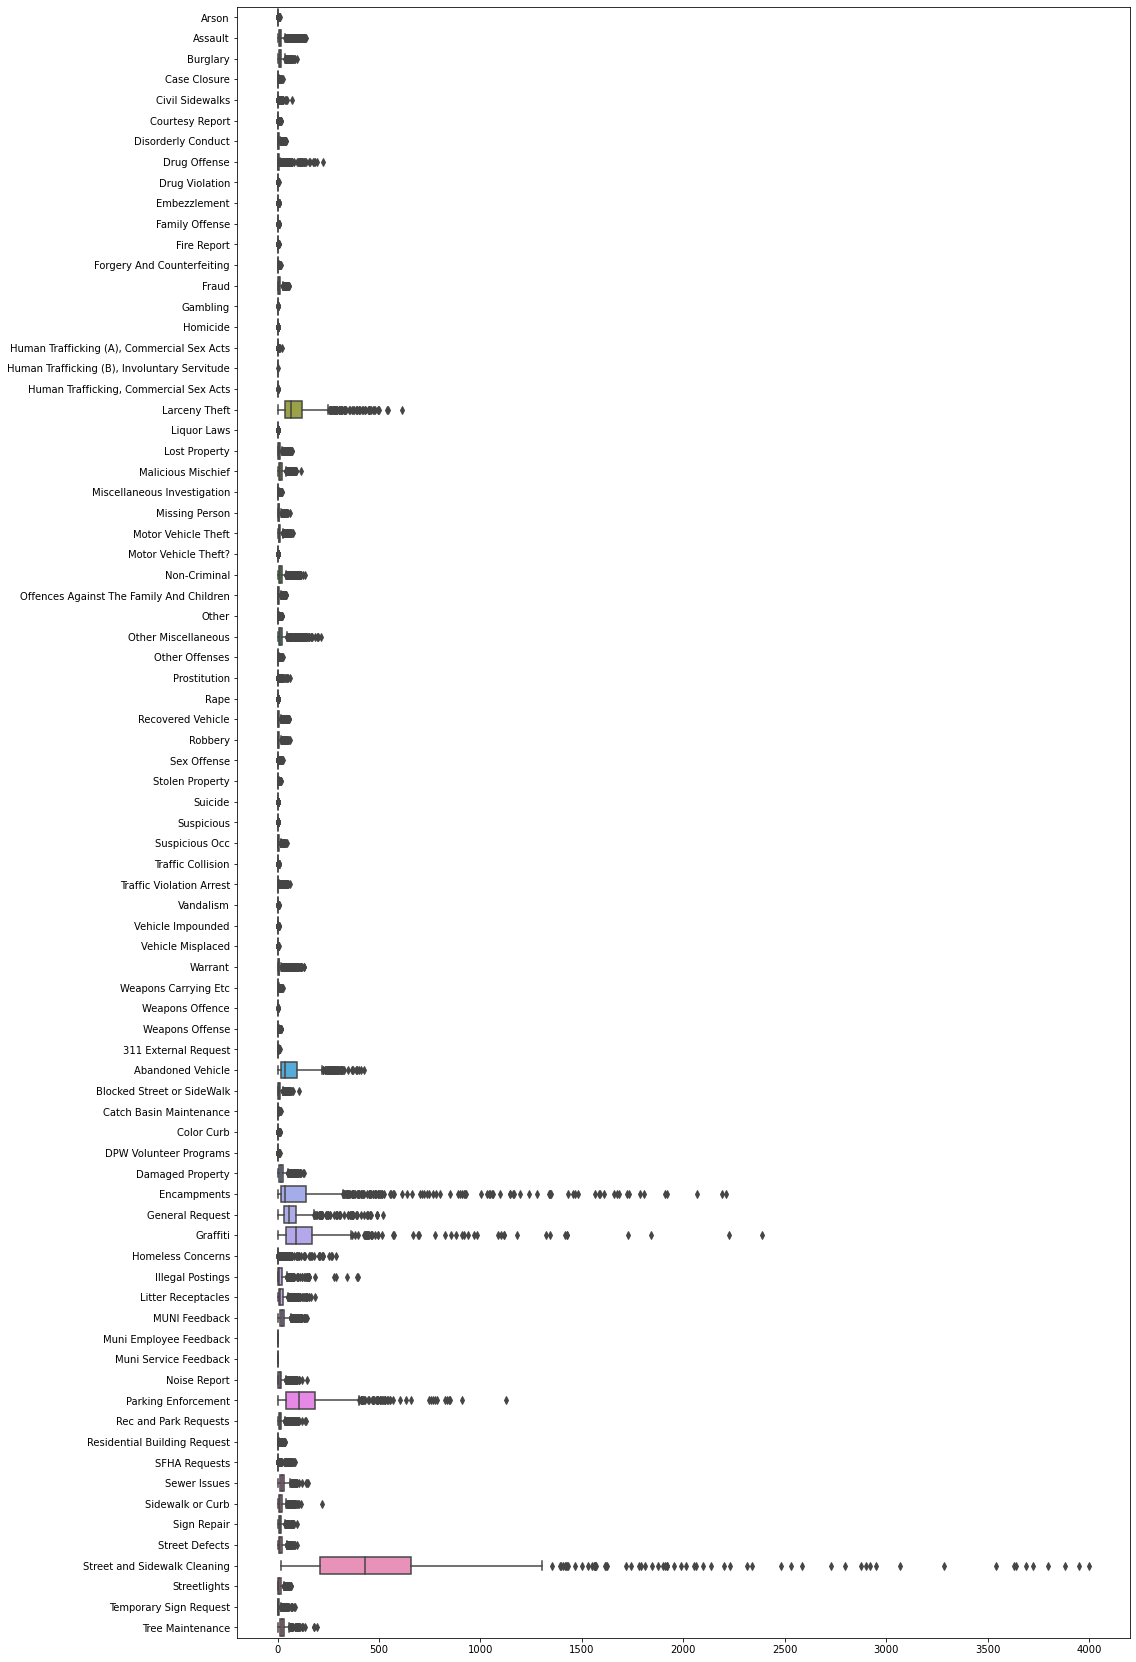

In [15]:
# Plot the features of X_train
f, ax = plt.subplots(figsize=(16,30))
g = sns.boxplot(data=X_train, orient='h')

The presence of outliers leads us to choose `RobustScaler`. Unlike `StandardScaler` and `MinMaxScaler`, `RobustScaler`'s centering and scaling is based on percentiles and thus not influenced by a few very large marginal outliers.

In [16]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Review the scaled after-effects on X_train
pd.set_option('display.max_rows', None)
display(pd.DataFrame(X_train_scaled).describe().T)
pd.reset_option('display.max_rows')

,count,mean,std,min,25%,50%,75%,max
0,900.0,0.758889,1.375407,0.000000,0.000000,0.0,1.000000,10.000000
1,900.0,0.786581,2.160780,-0.769231,-0.384615,0.0,0.615385,9.846154
2,900.0,0.295128,1.086697,-0.846154,-0.384615,0.0,0.615385,6.615385
3,900.0,0.251111,1.371994,-0.500000,-0.500000,0.0,0.500000,12.500000
4,900.0,0.924444,4.520976,0.000000,0.000000,0.0,0.000000,72.000000
5,900.0,1.022222,2.100256,0.000000,0.000000,0.0,1.000000,18.000000
6,900.0,0.412222,1.453616,-0.800000,-0.400000,0.0,0.600000,7.600000
7,900.0,1.354889,4.989436,-0.400000,-0.400000,0.0,0.600000,44.600000
8,900.0,0.113333,0.448009,0.000000,0.000000,0.0,0.000000,5.000000
9,900.0,0.487778,1.039201,0.000000,0.000000,0.0,1.000000,8.000000


## 7 Calculate the PCA<a id='7_Calculate_the_PCA'></a>

Fit a PCA transformation using the scaled data.

In [18]:
pca = PCA().fit(X_train_scaled)

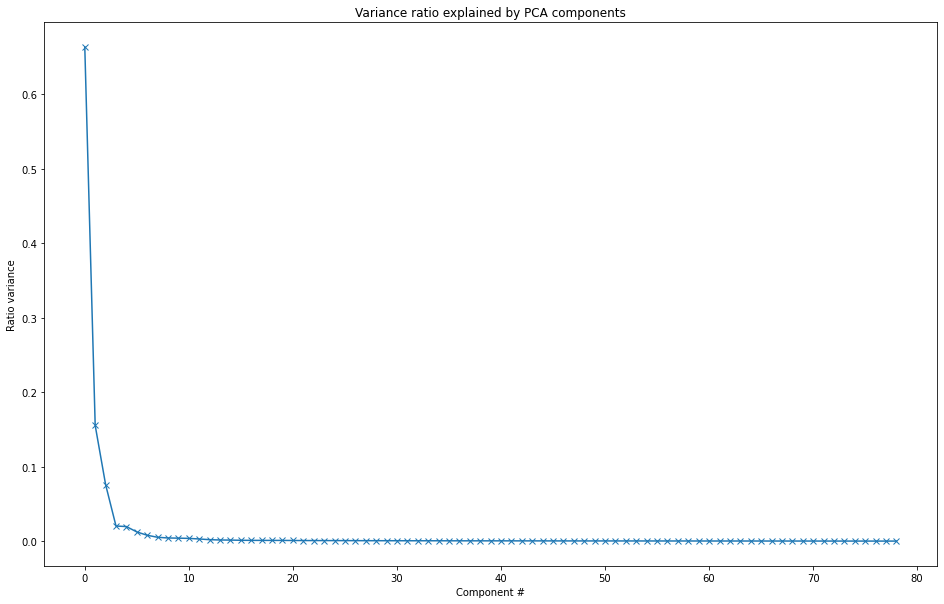

In [19]:
plt.subplots(figsize=(16, 10))
plt.plot(pca.explained_variance_ratio_, marker='x')
plt.xlabel('Component #')
plt.ylabel('Ratio variance')
plt.title('Variance ratio explained by PCA components');

It appears that the number of PCA components should be 3.

In [20]:
pca_3components = PCA(n_components=3, random_state=42)
pca_features = pca_3components.fit_transform(X_train_scaled)

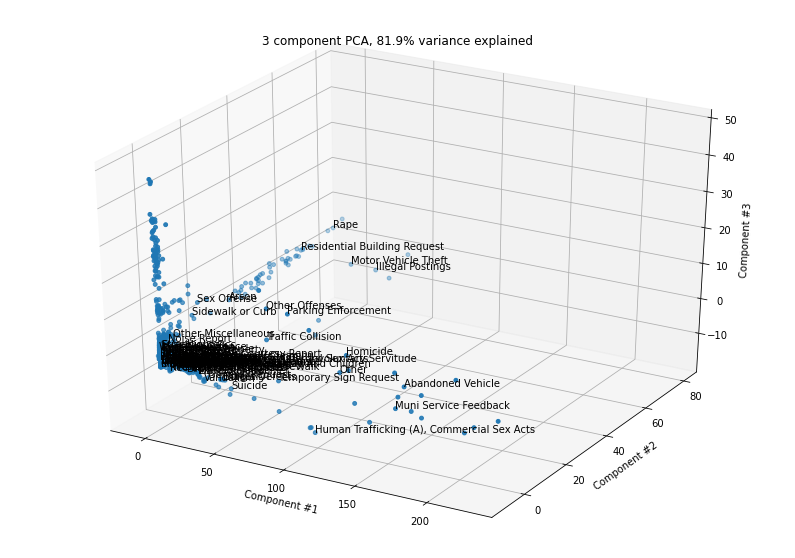

In [21]:
# let's also plot how much of the variance is explained by 3 components of PCA
from mpl_toolkits.mplot3d import Axes3D

x = pca_features[:, 0]
y = pca_features[:, 1]
z = pca_features[:, 2]
feature_names = X_train.columns
pc_var = 100 * pca.explained_variance_ratio_.cumsum()[1]

fig = plt.figure(figsize=[14,10])
ax = fig.add_subplot(111,projection='3d')
sc = ax.scatter(x, y, z, s=15)
_ = ax.set_xlabel('Component #1')
_ = ax.set_ylabel('Component #2')
_ = ax.set_zlabel('Component #3')
_ = ax.set_title(f'3 component PCA, {pc_var:.1f}% variance explained')
for f, x, y, z in zip(feature_names, x, y, z):
    _ = ax.text(x, y, z, f, None)

Nearly 82% of the variance is explained by using 3 component PCA!